# Exploración de datos sobre Airbnb en Nueva York 2019. Análisis, visualización y predicción

Este archivo de datos incluye toda la información necesaria para saber más sobre los hosts, la disponibilidad geográfica, las métricas necesarias para hacer predicciones y sacar conclusiones.

In [41]:
# Importando librerías necesarias para el análisis del Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Cargamos el conjunto de datos a nuestro Dataframe

df = pd.read_csv("/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv")

# Visualizamos las dimensiones e informacion del conjunto de datos

print(df.shape)


(48895, 16)


El DataFrame contiene 48.895 registros (filas) y 16 variables (columnas).

In [43]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [44]:
# Visualizamos los tipos de datos de cada columna del Dataframe

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

El conjunto de datos contiene 7 variables categóricas (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type).

Y contiene 9 variables numéricas (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365).

In [45]:
# Removiendo datos duplicados si existen

df.duplicated().sum()
df.drop_duplicates(inplace=True)

Luego de visualizar previamente la cabecera del conjunto de datos, se puede notar que existen algunos valores NaN, por lo tanto necesitamos examinar más a fondo los valores faltantes antes de continuar con el análisis


In [46]:
#buscando averiguar primero qué columnas tienen valores nulos
#utilizando la función 'sum' veremos cuántos valores nulos hay en cada columna del conjunto de datos

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Los datos ausentes que se observan no necesitan un tratamiento demasiado especial. Si nos fijamos en la naturaleza de nuestro conjunto de datos, podemos afirmar otras cosas: las columnas "id", "name" y "host_name" son irrelevantes e insignificantes para nuestro análisis de datos; las columnas "last_review" es la fecha; si no hay valoraciones para el anuncio, la fecha simplemente no existe. En nuestro caso, esta columna es irrelevante e insignificante, por lo que no es necesario añadir esos valores.

Para la columna "review_per_month" podemos simplemente añadirle 0.0 para los valores que faltan; podemos ver que en "number_of_review" esa columna tendrá un 0, por lo tanto siguiendo esta lógica con 0 opiniones totales habrá 0.0 tasa de opiniones por mes.

Por lo tanto, vamos a proceder con la eliminación de las columnas que no son importantes y el manejo de los datos que faltan.

In [47]:
#eliminando las columnas que no son significativas o que podrían ser poco éticas para utilizarlas en nuestra futura exploración y predicción de datos.
df.drop(['id','name','host_id','host_name','latitude','longitude','last_review'], axis=1, inplace=True)

In [48]:
#Examinando los cambios
print(df.shape)
df.head(3)

(48895, 9)


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365


In [49]:
#reemplazando todos los valores NaN en 'reviews_per_month' por 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [50]:
#Examinando los cambios
df.reviews_per_month.isnull().sum()

0

In [51]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               48895 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.4+ MB


## Análisis y visualización de variables univariante
Para variables categoricas: neighbourhood_group, neighbourhood y room_type.


### neighbourhood_group

In [52]:
#examinamos los valores únicos de n_group ya que esta columna será muy útil para análisis posteriores

df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [53]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

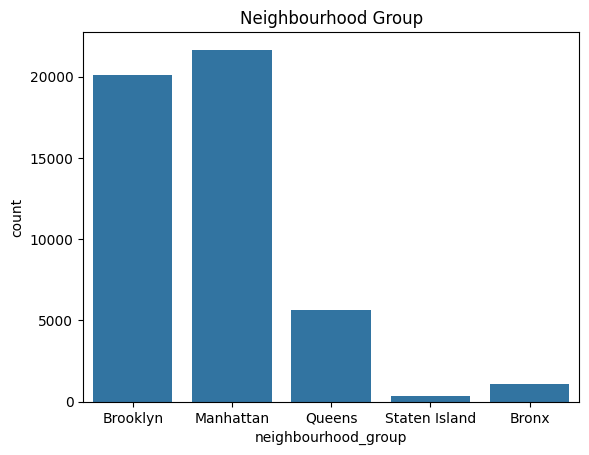

In [54]:
sns.countplot(x="neighbourhood_group", data=df)
plt.title('Neighbourhood Group')
plt.show()

Por parte del Neighbourhod group, podemos observar que la mayoria de los ABnB se concentran en Manhattan y Brooklyn, con una cantidad de inmuebles para alquiler en cada zona de aproximadamente 20K registros, siendo Manhattan donde mas oferta de ABnB podemos encontrar. Despues nos encontramos con Queens, Bronx y State Island siendo este ultimo el que tiene el menor oferta de ABnB.

### neighbourhood

In [55]:
#examinamos los valores únicos de neighbourhood ya que esta columna será muy útil para análisis posteriores
len(df.neighbourhood.unique())

221

In [56]:
df2=pd.DataFrame(df['neighbourhood'].value_counts()).reset_index().rename(columns={'index': 'neighbourhood','neighbourhood':'count'})
df2

,count,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


<BarContainer object of 10 artists>

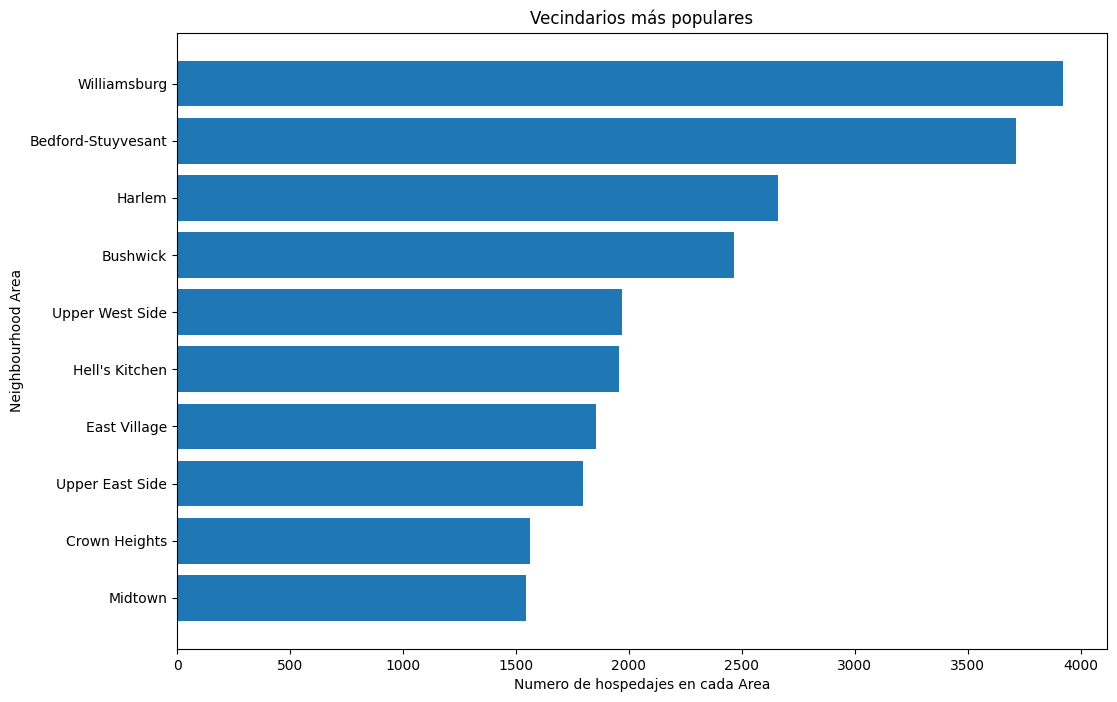

In [57]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Vecindarios más populares")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Numero de hospedajes en cada Area")

plt.barh(x, y)

### Room type

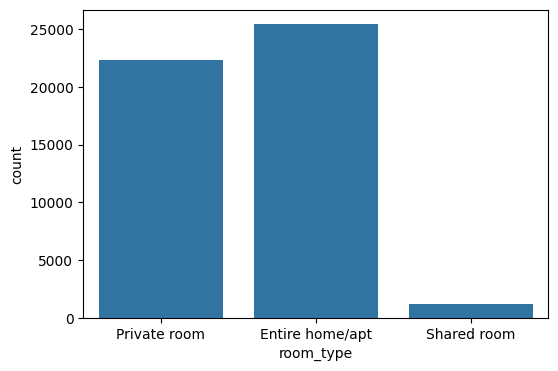

In [59]:
plt.figure(figsize = (6, 4))
sns.countplot(x="room_type", data=df)
plt.show()